In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [2]:
#Carga los dataset
li = []
for file in os.listdir("Dataset"):
    print('Reading file: ' + os.path.join("Dataset: ", file))
    df = pd.read_csv(os.path.join("Dataset", file))
    li.append(df)
TraficoTotal = pd.concat(li, axis=0, ignore_index=True)

Reading file: Dataset: /traffic122019.csv
Reading file: Dataset: /traffic022019.csv
Reading file: Dataset: /.DS_Store
Reading file: Dataset: /traffic062019 parte1.csv
Reading file: Dataset: /traffic032019.csv
Reading file: Dataset: /traffic082019.csv
Reading file: Dataset: /traffic112019.csv
Reading file: Dataset: /traffic012019.csv
Reading file: Dataset: /traffic102019.csv
Reading file: Dataset: /traffic092019.csv
Reading file: Dataset: /traffic052019.csv
Reading file: Dataset: /traffic042019.csv
Reading file: Dataset: /traffic062019.csv
Reading file: Dataset: /traffic 062019.csv
Reading file: Dataset: /traffic072019.csv


/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [3]:
TraficoTotal.shape

(11821705, 12)

In [4]:
#Funcion que cambia el formato de las fechas 
def change_format(x):
    fec = str(x)
    ano=fec[0:4]
    mes=fec[4:6]
    dia=fec[6:8]
    tiempo=fec[8:14]
    final = ano + '/' + mes + '/' + dia + ' ' + tiempo[0:2] + ':' + tiempo[2:4] + ':' + tiempo[4:6] 
    return final 

In [5]:
#Aplicamos el cambio de formato a las fechas
TraficoTotal['DT_MEASURE_DATETIME'] = TraficoTotal['DT_MEASURE_DATETIME'].apply(change_format)
TraficoTotal['DT_MEASURE_DATETIME'] = pd.to_datetime(TraficoTotal['DT_MEASURE_DATETIME'])
TraficoTotal.head()


KeyboardInterrupt: 

In [7]:
#Vemos cuantos routers e interfaces contiene cada uno de los datos suministrados
print('Routers')
print(len(TraficoTotal.SC_ROUTER.unique()))
print(TraficoTotal.SC_ROUTER.unique())

print('Interfaces')
print(len(TraficoTotal.DE_INTERFACE.unique()))
print(TraficoTotal.DE_INTERFACE.unique())


Routers
6
['BBVA-ESP-TRC-MW-1-437644' 'BBVA-ESP-TRC-MW-2-437644'
 'BBVA-MEX-ATA-MW-1-1006634' 'BBVA-MEX-ATA-MW-2-1006634'
 'CMEX-MEX-OCCRTRDW01' 'CMEX-ESP-OCCRTRDW01']
Interfaces
78
['TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.101'
 'TenGigabitEthernet0/1/0.102' 'TenGigabitEthernet0/1/0.104'
 'TenGigabitEthernet0/1/0.106' 'TenGigabitEthernet0/1/0.107' 'Tunnel5'
 'Tunnel59' 'Tunnel60' 'TenGigabitEthernet0/1/0'
 'TenGigabitEthernet0/1/0.103' 'TenGigabitEthernet0/1/0.109'
 'TenGigabitEthernet0/1/0.108' 'TenGigabitEthernet0/1/0.110'
 'TenGigabitEthernet0/1/0.111' 'TenGigabitEthernet0/1/0.112'
 'TenGigabitEthernet0/1/0.113' 'TenGigabitEthernet0/1/0.114'
 'TenGigabitEthernet0/1/0.115' 'TenGigabitEthernet0/1/0.116' 'Tunnel50'
 'Tunnel63' 'Tunnel64' 'Tunnel1' 'Tunnel65' 'Tunnel2' 'Tunnel3' 'Tunnel4'
 'Tunnel57' 'Tunnel58' 'Tunnel54' 'Tunnel55' 'Tunnel56' 'Tunnel61'
 'Tunnel62' 'GigabitEthernet0/0/0' 'GigabitEthernet0/0' 'Tunnel6'
 'TenGigabitEthernet0/1/0.120' 'Tunnel7' 'Tunnel8' 'T

In [5]:
#Para cada uno de los routers, vemos que interfaces contiene 
routers=TraficoTotal.SC_ROUTER.unique()
interfaces=TraficoTotal.DE_INTERFACE.unique()
for router in routers:
    rou = TraficoTotal.loc[TraficoTotal.SC_ROUTER == router]
    print('Router:  ' + router)
    print(rou.DE_INTERFACE.unique())

Router:  BBVA-MEX-ATA-MW-1-1006634
['TenGigabitEthernet0/1/0.120' 'Tunnel6' 'Tunnel7' 'Tunnel302' 'Tunnel8'
 'Tunnel303' 'Tunnel300' 'Tunnel301' 'Tunnel12'
 'TenGigabitEthernet0/1/0.101' 'Tunnel10' 'TenGigabitEthernet0/1/0.102'
 'Tunnel11' 'Tunnel9' 'TenGigabitEthernet0/1/0.103' 'Tunnel5'
 'TenGigabitEthernet0/1/0.108' 'Tunnel59' 'Tunnel60'
 'TenGigabitEthernet0/1/0' 'TenGigabitEthernet0/1/0.109'
 'TenGigabitEthernet0/1/0.100' 'TenGigabitEthernet0/1/0.114'
 'TenGigabitEthernet0/1/0.104' 'TenGigabitEthernet0/1/0.107'
 'TenGigabitEthernet0/1/0.115' 'TenGigabitEthernet0/1/0.110'
 'TenGigabitEthernet0/1/0.111' 'TenGigabitEthernet0/1/0.116'
 'TenGigabitEthernet0/1/0.112' 'TenGigabitEthernet0/1/0.113' 'Tunnel64'
 'Tunnel65' 'Tunnel63' 'Tunnel3' 'Tunnel1' 'Tunnel2' 'Tunnel4' 'Tunnel57'
 'Tunnel61' 'Tunnel58' 'Tunnel62' 'Tunnel50' 'Tunnel54' 'Tunnel55'
 'Tunnel56' 'TenGigabitEthernet0/1/0.124' 'TenGigabitEthernet0/1/0.125'
 'Tunnel13' 'Tunnel14' 'TenGigabitEthernet0/1/0.106']
Router:  BBVA-MEX

TypeError: can only concatenate str (not "float") to str

# CASO PARA ROUTERS QUE TRABAJAN DE MANERA PARALELA

In [9]:
#Caso routers en paralelo BBVA-ESP-TRC-MW 437644
tra1 =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'BBVA-ESP-TRC-MW-1-437644']
tra2 =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'BBVA-ESP-TRC-MW-2-437644']

In [10]:
#Filtramos su lista de interfaces
interfaceList=['TenGigabitEthernet0/1/0.100', 'TenGigabitEthernet0/1/0.101',
 'TenGigabitEthernet0/1/0.102' ,'TenGigabitEthernet0/1/0.104',
 'TenGigabitEthernet0/1/0.106' ,'TenGigabitEthernet0/1/0.107',
 'TenGigabitEthernet0/1/0' ,'TenGigabitEthernet0/1/0.110' ,'TenGigabitEthernet0/1/0.123',
 'TenGigabitEthernet0/1/0.124']
tra1 =  tra1.loc[tra1.DE_INTERFACE.isin(interfaceList)]
tra2 =  tra2.loc[tra2.DE_INTERFACE.isin(interfaceList)]



In [11]:
tra1 = tra1.sort_values(by=['DT_MEASURE_DATETIME'])
tra1.head(10)

,DE_CUSTOMER_NAME,DE_INTERFACE,DT_MEASURE_DATETIME,DT_MEASURE_DATETIME_1,NU_SPEED,NU_TRAFFIC_INPUT,NU_TRAFFIC_OUTPUT,SC_INTERFACE_TYPE,SC_ROUTER,SD_ADMINISTRATIVE_NUMBER,Unnamed: 0
0,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:05:00,01/01/19,1.000000e+10,13305027.0,14886319.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
26755,BBVA,TenGigabitEthernet0/1/0.104,2019-01-01 00:05:00,01/01/19,1.000000e+10,597.0,38.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
8918,BBVA,TenGigabitEthernet0/1/0.101,2019-01-01 00:05:00,01/01/19,1.000000e+10,598.0,40.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
35672,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:05:00,01/01/19,1.000000e+10,482884.0,19720.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
44590,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:05:00,01/01/19,5.000000e+09,165.0,835.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
17836,BBVA,TenGigabitEthernet0/1/0.102,2019-01-01 00:05:00,01/01/19,1.000000e+10,1158.0,715.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
1,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:10:00,01/01/19,1.000000e+10,12808633.0,15743063.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
26756,BBVA,TenGigabitEthernet0/1/0.104,2019-01-01 00:10:00,01/01/19,1.000000e+10,600.0,42.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
44591,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:10:00,01/01/19,5.000000e+09,176.0,824.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN
35673,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:10:00,01/01/19,1.000000e+10,484813.0,19263.0,WAN,BBVA-ESP-TRC-MW-1-437644,437644.0,NaN


In [12]:
tra2 = tra2.sort_values(by=['DT_MEASURE_DATETIME'])
tra2.head(10)

,DE_CUSTOMER_NAME,DE_INTERFACE,DT_MEASURE_DATETIME,DT_MEASURE_DATETIME_1,NU_SPEED,NU_TRAFFIC_INPUT,NU_TRAFFIC_OUTPUT,SC_INTERFACE_TYPE,SC_ROUTER,SD_ADMINISTRATIVE_NUMBER,Unnamed: 0
89156,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:05:00,01/01/19,1.000000e+10,5788.0,794.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
71332,BBVA,TenGigabitEthernet0/1/0.102,2019-01-01 00:05:00,01/01/19,1.000000e+10,1163.0,722.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
80245,BBVA,TenGigabitEthernet0/1/0.104,2019-01-01 00:05:00,01/01/19,1.000000e+10,601.0,43.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
98068,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:05:00,01/01/19,5.000000e+09,162.0,821.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
62420,BBVA,TenGigabitEthernet0/1/0.101,2019-01-01 00:05:00,01/01/19,1.000000e+10,602.0,42.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
53509,BBVA,TenGigabitEthernet0/1/0.100,2019-01-01 00:05:00,01/01/19,1.000000e+10,3823.0,26343.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
98069,BBVA,TenGigabitEthernet0/1/0.107,2019-01-01 00:10:00,01/01/19,5.000000e+09,204.0,835.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
89157,BBVA,TenGigabitEthernet0/1/0.106,2019-01-01 00:10:00,01/01/19,1.000000e+10,5797.0,798.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
71333,BBVA,TenGigabitEthernet0/1/0.102,2019-01-01 00:10:00,01/01/19,1.000000e+10,1160.0,724.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN
62421,BBVA,TenGigabitEthernet0/1/0.101,2019-01-01 00:10:00,01/01/19,1.000000e+10,602.0,43.0,WAN,BBVA-ESP-TRC-MW-2-437644,437644.0,NaN


In [13]:
#Para cada uno de los routers, vemos que interfaces contiene 
for interface in interfaceList:
    inter1 = tra1.loc[tra1.DE_INTERFACE == interface]
    inter2 = tra2.loc[tra2.DE_INTERFACE == interface]
    print('Interfaz:  ' + interface)
    print('Router 1: ' + str(inter1.shape[0]))
    print('Router 2: ' + str(inter2.shape[0]))

Interfaz:  TenGigabitEthernet0/1/0.100
Router 1: 78492
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.101
Router 1: 82153
Router 2: 78377
Interfaz:  TenGigabitEthernet0/1/0.102
Router 1: 87361
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.104
Router 1: 87361
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.106
Router 1: 78492
Router 2: 78379
Interfaz:  TenGigabitEthernet0/1/0.107
Router 1: 78493
Router 2: 78377
Interfaz:  TenGigabitEthernet0/1/0
Router 1: 59721
Router 2: 55518
Interfaz:  TenGigabitEthernet0/1/0.110
Router 1: 39201
Router 2: 39983
Interfaz:  TenGigabitEthernet0/1/0.123
Router 1: 33154
Router 2: 24295
Interfaz:  TenGigabitEthernet0/1/0.124
Router 1: 10542
Router 2: 3744


In [14]:
#Filtrado de la interfaz TenGigabitEthernet0/1/0.101
router1_inter1 = tra1.loc[tra1.DE_INTERFACE == 'TenGigabitEthernet0/1/0.101']
router2_inter1 = tra2.loc[tra2.DE_INTERFACE == 'TenGigabitEthernet0/1/0.101']
print(router1_inter1.shape[0])
router2_inter1.shape[0]

82153


78377

In [15]:
#Compara las fechas y guarda aquellas que un router no tenga sobre del otro
#La finalidad de este metodo es que en el caso de balanceo de carga el trafico ha de sumarse pero el numero de 
#datos no coinciden por lo que creamos y añadimos estas dechas a cada uno de los routers con valores iguales a 0.
def fecha_incluida(df1, df2):
    fechas1_2 = [x for x in df1.DT_MEASURE_DATETIME.values if x not in df2.DT_MEASURE_DATETIME.values]
    fechas2_1 = [x for x in df2.DT_MEASURE_DATETIME.values if x not in df1.DT_MEASURE_DATETIME.values]
    return fechas1_2,fechas2_1

In [16]:
#Ejecutamos fecha incluida
fechas1_2,fechas2_1 = fecha_incluida(router1_inter1, router2_inter1)
print(fechas1_2)
#print(fechas2_1)

[numpy.datetime64('2019-01-05T08:25:00.000000000'), numpy.datetime64('2019-01-18T10:50:00.000000000'), numpy.datetime64('2019-01-18T10:55:00.000000000'), numpy.datetime64('2019-01-18T11:00:00.000000000'), numpy.datetime64('2019-01-18T11:05:00.000000000'), numpy.datetime64('2019-01-18T11:10:00.000000000'), numpy.datetime64('2019-02-04T23:10:00.000000000'), numpy.datetime64('2019-03-13T22:05:00.000000000'), numpy.datetime64('2019-03-25T19:50:00.000000000'), numpy.datetime64('2019-04-03T18:15:00.000000000'), numpy.datetime64('2019-04-08T21:25:00.000000000'), numpy.datetime64('2019-04-12T22:05:00.000000000'), numpy.datetime64('2019-04-17T20:00:00.000000000'), numpy.datetime64('2019-04-19T20:25:00.000000000'), numpy.datetime64('2019-04-24T19:40:00.000000000'), numpy.datetime64('2019-04-25T20:10:00.000000000'), numpy.datetime64('2019-04-29T21:00:00.000000000'), numpy.datetime64('2019-04-30T13:15:00.000000000'), numpy.datetime64('2019-05-03T02:15:00.000000000'), numpy.datetime64('2019-05-05T0

In [39]:
#fechas que estan en 1 y no en dos 
print('Numero de fechas que estan en el router 1 y no en el router 2 :')
print(len(fechas1_2))
#fechas que estan en 2 y no en 1
print('Numero de fechas que estan en el router 2 y no en el router 1:')
print(len(fechas2_1))

print('Numero de datos del router 1:')
print(router1_inter1.shape[0])
print('Numero de datos del router 2:')
print(router2_inter1.shape[0])

print('Suma de el numero de datos del router 1 con numero de fechas que estan en 2 y no en 1:')
print(router1_inter1.shape[0] + len(fechas2_1))
print('Suma de el numero de datos del router 2 con numero de fechas que estan en 1 y no en 2:')
print(router2_inter1.shape[0] + len(fechas1_2))



Numero de fechas que estan en el router 1 y no en el router 2 :
3836
Numero de fechas que estan en el router 2 y no en el router 1:
60
Numero de datos del router 1:
82153
Numero de datos del router 2:
78377
Suma de el numero de datos del router 1 con numero de fechas que estan en 2 y no en 1:
82213
Suma de el numero de datos del router 2 con numero de fechas que estan en 1 y no en 2:
82213


# Router con una interfaz

In [5]:
#Router de mexico lleva en funcionamiento 5 años, es el primero que utilizar 
traInter =  TraficoTotal.loc[TraficoTotal.SC_ROUTER == 'CMEX-MEX-OCCRTRDW01']
traInter=traInter.iloc[:,[2,6]]
traInter.head()

,DT_MEASURE_DATETIME,NU_TRAFFIC_OUTPUT
759479,2.019120e+13,39392882.0
759480,2.019120e+13,35677690.0
759481,2.019120e+13,35799030.0
759482,2.019120e+13,38604984.0
759483,2.019120e+13,34438405.0


In [6]:
traInter['DT_MEASURE_DATETIME'] = traInter['DT_MEASURE_DATETIME'].apply(change_format)
traInter['DT_MEASURE_DATETIME'] = pd.to_datetime(traInter['DT_MEASURE_DATETIME'])
traInter.set_index('DT_MEASURE_DATETIME', inplace = True) #Lo seteo como indice 

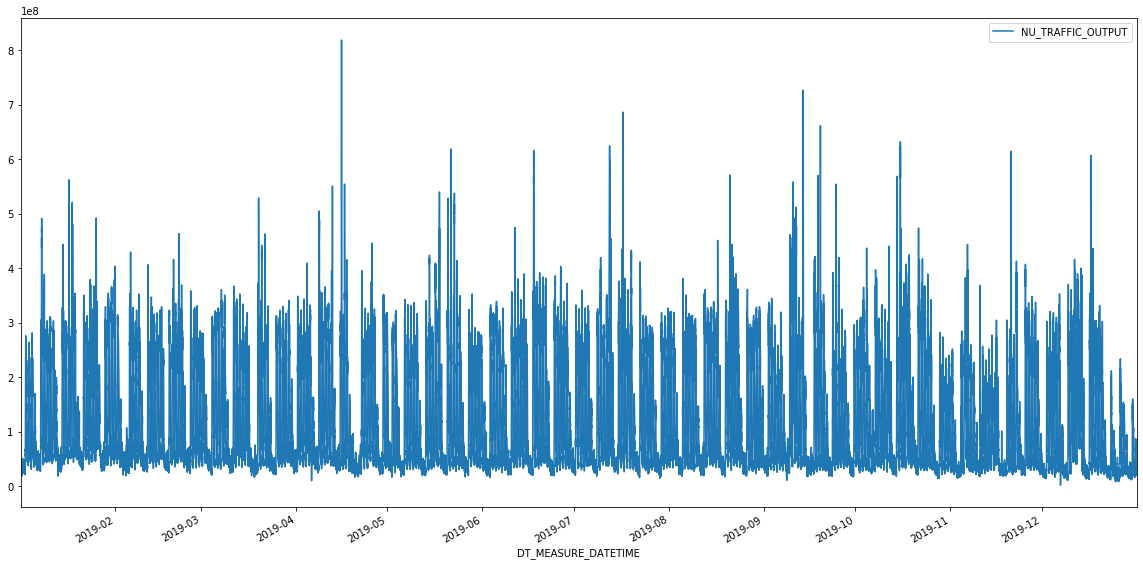

In [7]:
traInter.plot(figsize = (20,10))

In [7]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

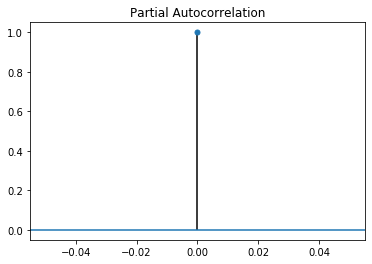

In [8]:
plot_pacf(traInter)
pyplot.show()

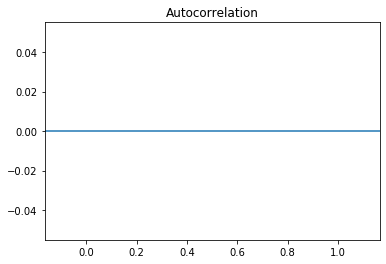

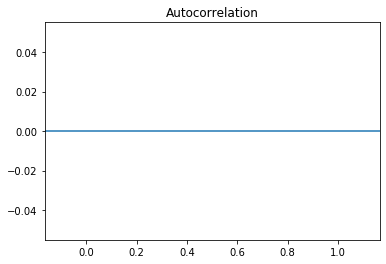

In [9]:
plot_acf(traInter,lags=250)
plot_acf(traInter)
pyplot.show()

In [8]:
traInter=traInter.sort_values(by='DT_MEASURE_DATETIME')

In [8]:
traInter['Secuencia'] = np.arange(len(traInter))

In [11]:
traInter2=traInter.iloc[:,[1,2]]
traInter2.set_index('Secuencia', inplace = True) #Lo seteo como indice 

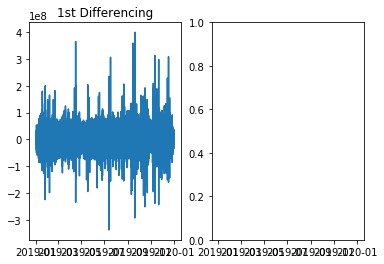

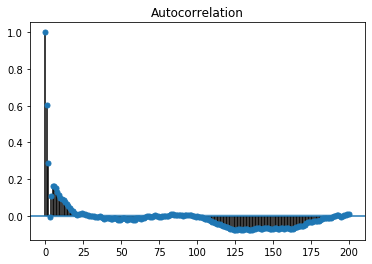

In [12]:
ig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(traInter2.NU_TRAFFIC_OUTPUT.diff(3)); axes[0].set_title('1st Differencing')

plot_acf(traInter2.NU_TRAFFIC_OUTPUT.diff(3).dropna(), lags=200)

plt.show()

In [10]:
df=traInter2
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.NU_TRAFFIC_OUTPUT.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


NameError: name 'traInter2' is not defined

In [14]:
result = adfuller(df.NU_TRAFFIC_OUTPUT.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -30.080950
p-value: 0.000000


In [11]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.NU_TRAFFIC_OUTPUT.dropna(), order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


KeyboardInterrupt: 

In [82]:
# 1,0,2 ARIMA Model
model = ARIMA(df.NU_TRAFFIC_OUTPUT.dropna(), order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.NU_TRAFFIC_OUTPUT   No. Observations:               104674
Model:                  ARIMA(1, 1, 1)   Log Likelihood            -1859461.480
Method:                        css-mle   S.D. of innovations       12551770.642
Date:                 Mon, 03 Feb 2020   AIC                        3718930.960
Time:                         13:34:55   BIC                        3718969.195
Sample:                              1   HQIC                       3718942.540
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -297.0192   3.32e+04     -0.009      0.993   -6.54e+04    6.48e+04
ar.L1.D.NU_TRAFFIC_OUTPUT     0.1767      0.015     11.510      0.000       0.

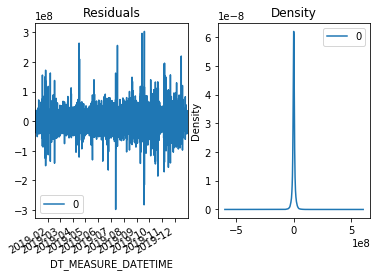

In [16]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

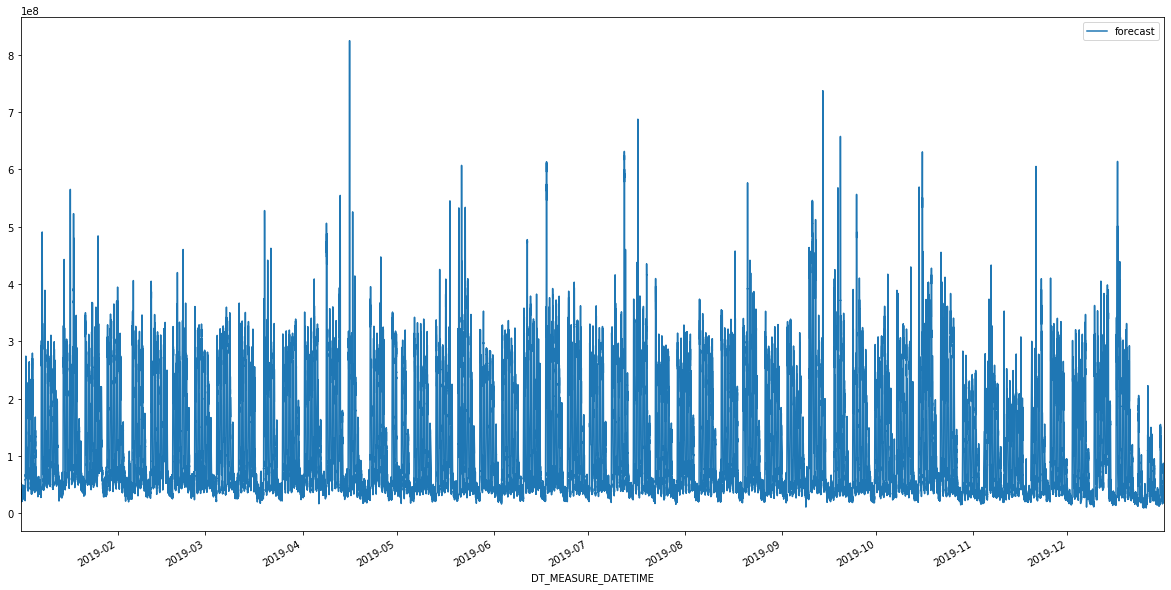

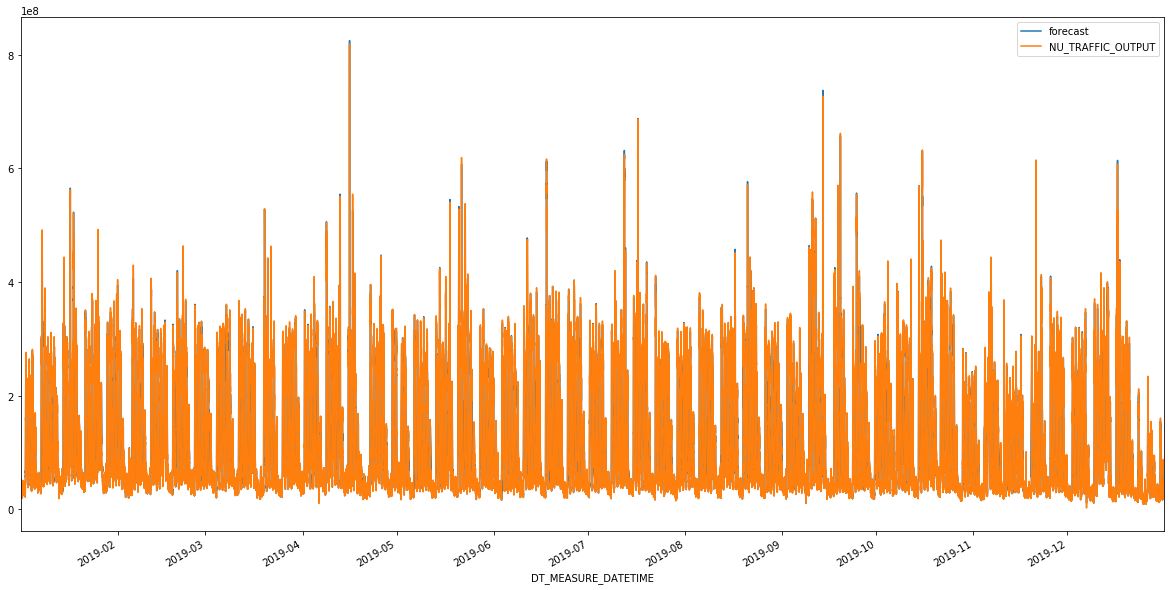

In [17]:
# Actual vs Fitted
fig = model_fit.plot_predict(dynamic=False,plot_insample=False)
fig2 = model_fit.plot_predict(dynamic=False,plot_insample=True)

fig.set_size_inches(20.5, 10.5)
fig2.set_size_inches(20.5, 10.5)

plt.show()


In [85]:
df.shape

(104685, 1)

In [18]:

# Create Training and Test
train = df.NU_TRAFFIC_OUTPUT[:83748]
test = df.NU_TRAFFIC_OUTPUT[83748:]
test.head()


DT_MEASURE_DATETIME
2019-10-20 05:55:00    80830472.0
2019-10-20 06:00:00    75360992.0
2019-10-20 06:05:00    65620828.0
2019-10-20 06:10:00    64812996.0
2019-10-20 06:15:00    60844312.0
Name: NU_TRAFFIC_OUTPUT, dtype: float64

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


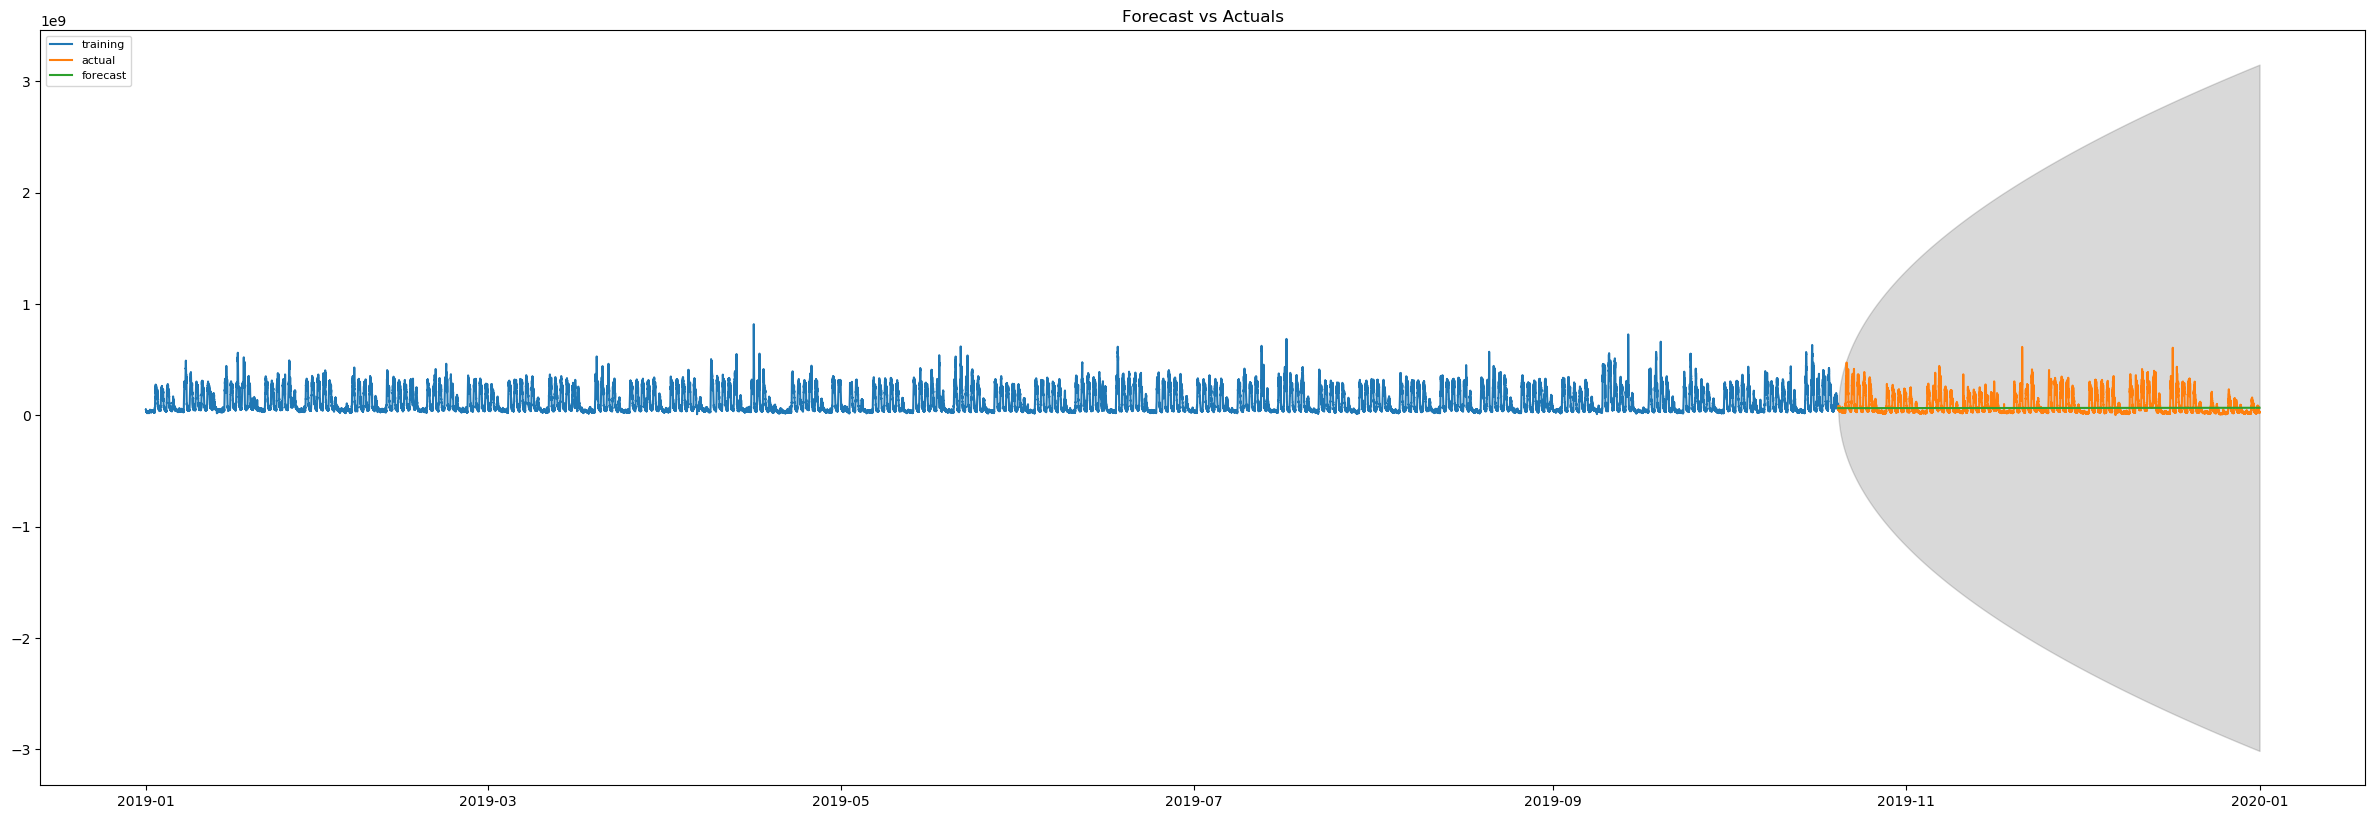

In [19]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(20937, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(30,10), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



In [21]:
forecast_accuracy(fc, test)

/Users/lopoloalex/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'mape': 0.9024951673005297,
 'me': -26679651.202647306,
 'mae': 63827227.78118558,
 'mpe': 0.456657203852731,
 'rmse': 89301190.64877602,
 'acf1': nan,
 'corr': nan,
 'minmax': nan}

# Auto Arima

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df= traInter

model = pm.auto_arima(df.NU_TRAFFIC_OUTPUT.dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=3718766.896, BIC=3718805.130, Fit time=6.501 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=4153139.526, BIC=4153158.644, Fit time=1.776 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=3720056.906, BIC=3720085.581, Fit time=2.186 seconds
Near non-invertible roots for order (1, 0, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.992)
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=4079374.960, BIC=4079403.636, Fit time=9.823 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=4243154.433, BIC=4243163.992, Fit time=0.972 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=3718687.940, BIC=3718735.733, Fit time=48.673 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=3718904.808, BIC=3718943.043, Fit time=4.160 seconds
Near non-invertible roots for order (2, 0, 0)(0, 0

In [10]:

from sklearn.metrics import mean_squared_error


# #############################################################################
# Load the data and split it into separate pieces
data = df
train, test = data[:83748].dropna(), data[83748:].dropna()

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                  max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                  stepwise=True, suppress_warnings=True, D=10, max_D=10,
                  error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])


plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")

Test RMSE: 107113417.781


NameError: name 'x_years' is not defined

In [11]:
df.shape

(104685, 1)

In [34]:
df.dropna().shape

(104675, 1)

In [54]:
df2 = pd.DataFrame(df)


In [56]:
df2.loc[df2.NU_TRAFFIC_OUTPUT.isna()]

,NU_TRAFFIC_OUTPUT
DT_MEASURE_DATETIME,
2019-12-07 02:20:00,NaN
2019-12-07 02:25:00,NaN
2019-12-07 02:30:00,NaN
2019-12-07 02:35:00,NaN
2019-12-07 02:40:00,NaN
2019-12-07 02:45:00,NaN
2019-12-07 03:10:00,NaN
2019-12-07 03:15:00,NaN
2019-12-07 03:20:00,NaN


In [97]:
start_date = '2019-12-07 00:00:00'
end_date = '2019-12-08 00:00:00'

In [82]:
df['DT_MEASURE_DATETIME'] = df.index.values

In [98]:
mask = (df['DT_MEASURE_DATETIME'] > start_date) & (df['DT_MEASURE_DATETIME'] <= end_date)

In [85]:
df = df[mask]

In [89]:
df.shape

(864, 2)

In [90]:
df = df.drop(['DT_MEASURE_DATETIME'], axis = 1)

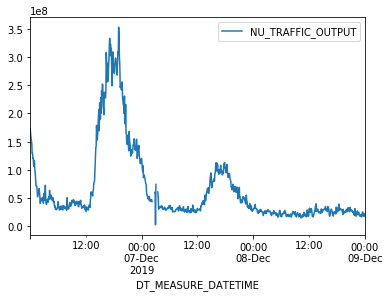

In [92]:
df.plot()

In [99]:
df = df[mask]

In [102]:
df = df.drop(['DT_MEASURE_DATETIME'], axis = 1)

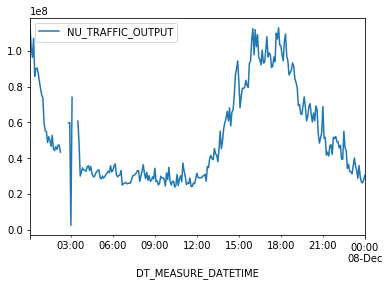

In [104]:
df.plot()

Prueba con 8H 

In [12]:
dfMean = df.resample('8H').mean()

In [13]:
dfMean.shape[0]*(0.9)

985.5

Test RMSE: 59140912.582


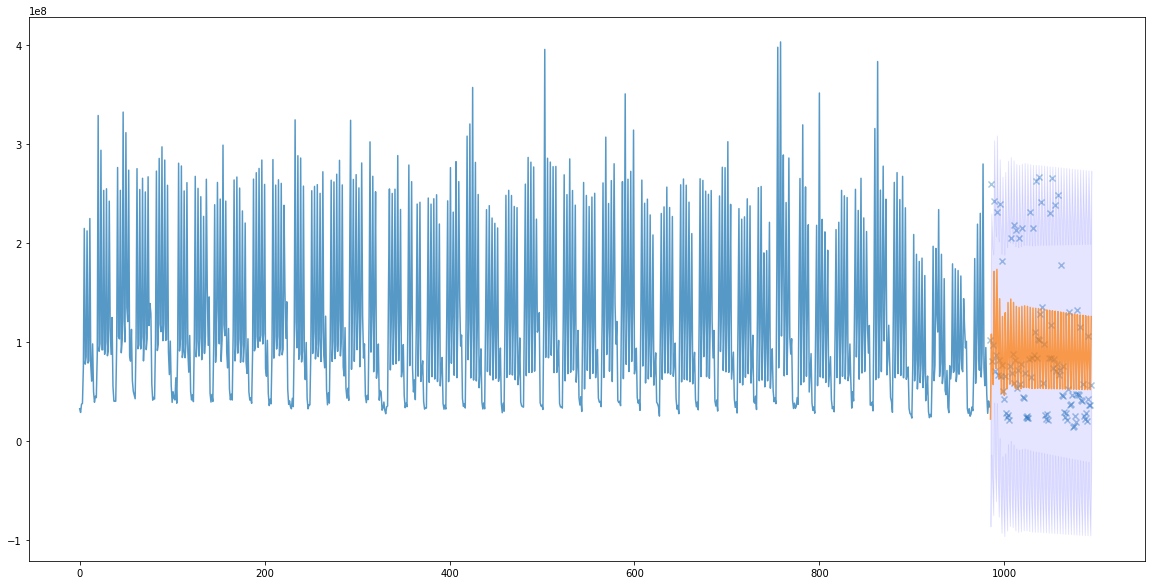

In [15]:
# #############################################################################
# Load the data and split it into separate pieces
data = dfMean
train, test = data[:985], data[985:].dropna()

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10,d=1, max_P=10, max_Q=10, seasonal=True,
                  stepwise=True, suppress_warnings=True, D=0, max_D=10,
                  error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])

plt.figure(figsize=(20,10))
plt.plot(x_axis[:train.shape[0]], train, alpha=0.75)
plt.plot(x_axis[train.shape[0]:], preds, alpha=0.75)  # Forecasts
plt.scatter(x_axis[train.shape[0]:], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')


In [17]:
dfMean = df.resample('1H').mean()

In [18]:
dfMean.shape[0]*(0.9)

7884.0

Test RMSE: 112469635.984


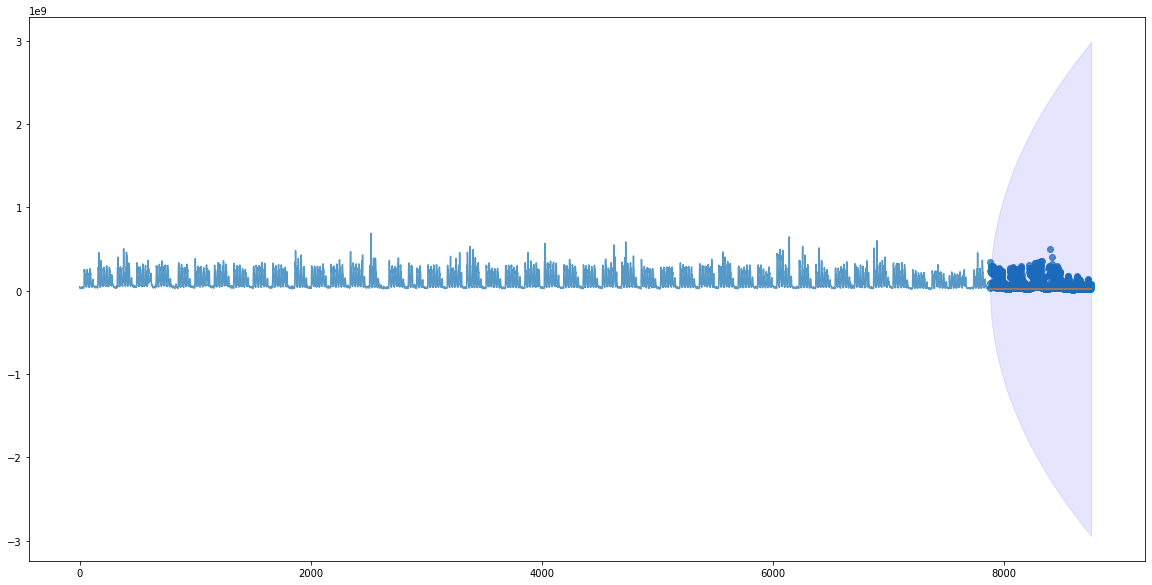

In [22]:
data = dfMean
train, test = data[:7884].dropna(), data[7884:].dropna()

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=0, d=1, start_q=0, start_P=0, start_Q=0,
                  seasonal=True,
                  stepwise=True, suppress_warnings=True, D=0,
                  error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])

plt.figure(figsize=(20,10))
plt.plot(x_axis[:train.shape[0]], train, alpha=0.75)
plt.plot(x_axis[train.shape[0]:], preds, alpha=0.75)  # Forecasts
plt.scatter(x_axis[train.shape[0]:], test, alpha=0.75)  # Test data
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')



Con 24 Horas

In [170]:
dfMean = df.resample('24H').mean()
dfMean.shape[0]*(0.9)

328.5

Test RMSE: 36263931.168


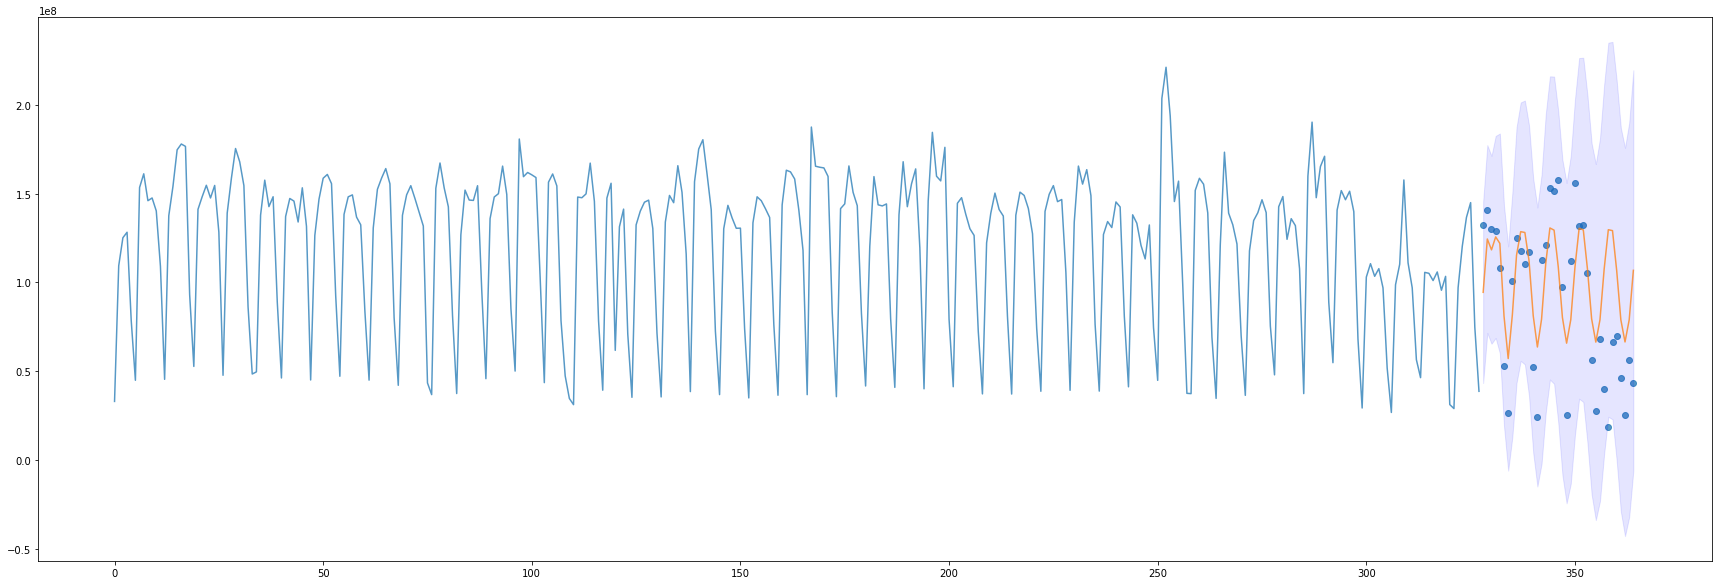

In [171]:
# #############################################################################
# Load the data and split it into separate pieces
data = dfMean
train, test = data[:328].dropna(), data[328:].dropna()

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0,
                  seasonal=True,
                  stepwise=True, suppress_warnings=True, D=0, max_D=10,
                  error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])

plt.figure(figsize=(20,10))
plt.plot(x_axis[:train.shape[0]], train, alpha=0.75)
plt.plot(x_axis[train.shape[0]:], preds, alpha=0.75)  # Forecasts
plt.scatter(x_axis[train.shape[0]:], test, alpha=0.75)  # Test data
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')



In [139]:
dfMean.shape[0]*(0.85)

310.25

Test RMSE: 45499826.861


Text(0.5, 0, 'Year')

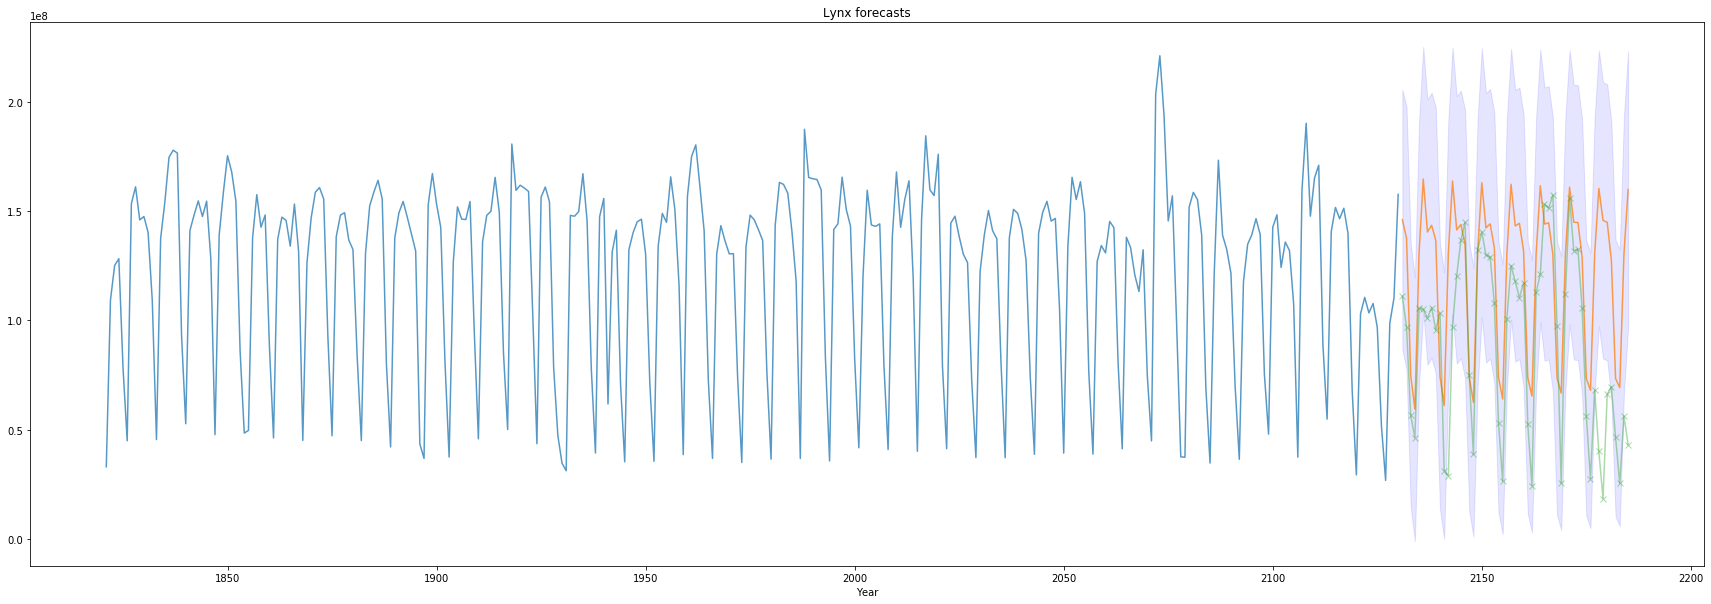

In [159]:
# #############################################################################
# Load the data and split it into separate pieces
data = dfMean
train, test = data[:310].dropna(), data[310:].dropna()

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                  stepwise=True, suppress_warnings=True, D=0, max_D=10,
                  error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])

plt.figure(figsize=(20,10))
plt.plot(x_axis[:train.shape[0]], train, alpha=0.75)
plt.plot(x_axis[train.shape[0]:], preds, alpha=0.75)  # Forecasts
plt.plot(x_axis[train.shape[0]:], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
